In [ ]:
import torch
from torchvision import transforms

from torchsummary import summary
import torch.optim as optim

from model import Net
from utils import build_mnist, Trainer, plot_sampledata, plot_history, evaluate_model

In [3]:
# CUDA?
cuda = torch.cuda.is_available()
print("CUDA Available?", cuda)

CUDA Available? True


In [2]:
# Train data transformations
train_transforms = transforms.Compose(
    [
        transforms.RandomApply(
            [
                transforms.CenterCrop(22),
            ],
            p=0.1,
        ),
        transforms.Resize((28, 28)),
        transforms.RandomRotation((-15.0, 15.0), fill=0),
        transforms.ToTensor(),
        transforms.Normalize((0.1307,), (0.3081,)),
    ]
)

# Test data transformations
test_transforms = transforms.Compose(
    [transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))]
)

In [4]:
batch_size = 512

kwargs = {
    "batch_size": batch_size,
    "shuffle": True,
    "num_workers": 2,
    "pin_memory": True,
}

train_data, train_loader = build_mnist(set="train", transforms=train_transforms, **kwargs)
test_data, test_loader = build_mnist(set="test", transforms=test_transforms, **kwargs)

100%|██████████| 9912422/9912422 [00:02<00:00, 4208791.70it/s]


Extracting ../data\MNIST\raw\train-images-idx3-ubyte.gz to ../data\MNIST\raw



100%|██████████| 28881/28881 [00:00<00:00, 1422047.50it/s]


Extracting ../data\MNIST\raw\train-labels-idx1-ubyte.gz to ../data\MNIST\raw



100%|██████████| 1648877/1648877 [00:01<00:00, 1480592.06it/s]


Extracting ../data\MNIST\raw\t10k-images-idx3-ubyte.gz to ../data\MNIST\raw



100%|██████████| 4542/4542 [00:00<?, ?it/s]

Extracting ../data\MNIST\raw\t10k-labels-idx1-ubyte.gz to ../data\MNIST\raw



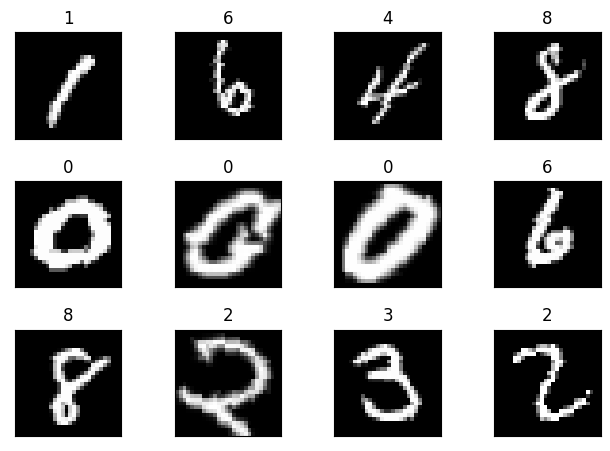

In [5]:
plot_sampledata(train_loader)

In [7]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
model = Net().to(device)
summary(model, input_size=(1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 26, 26]             288
            Conv2d-2           [-1, 64, 24, 24]          18,432
            Conv2d-3          [-1, 128, 10, 10]          73,728
            Conv2d-4            [-1, 256, 8, 8]         294,912
            Linear-5                   [-1, 50]         204,800
            Linear-6                   [-1, 10]             500
Total params: 592,660
Trainable params: 592,660
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.67
Params size (MB): 2.26
Estimated Total Size (MB): 2.93
----------------------------------------------------------------


In [9]:
model = Net().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)  # large learning rate
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=15, gamma=0.1, verbose=True)
num_epochs = 20

trainer = Trainer(model, device, optimizer)
for epoch in range(1, num_epochs + 1):
    print(f"Epoch {epoch}")
    trainer.train(train_loader)
    trainer.test(test_loader)
    scheduler.step()

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 1


Train: Loss=0.1479 Batch_id=117 Accuracy=49.31: 100%|██████████| 118/118 [00:09<00:00, 12.78it/s]


Test set: Average loss: 0.2420, Accuracy: 9241/10000 (92.41%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 2


Train: Loss=0.2554 Batch_id=117 Accuracy=93.72: 100%|██████████| 118/118 [00:07<00:00, 15.40it/s]


Test set: Average loss: 0.0861, Accuracy: 9724/10000 (97.24%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 3


Train: Loss=0.0671 Batch_id=117 Accuracy=96.03: 100%|██████████| 118/118 [00:08<00:00, 13.79it/s]


Test set: Average loss: 0.0620, Accuracy: 9793/10000 (97.93%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 4


Train: Loss=0.0690 Batch_id=117 Accuracy=96.96: 100%|██████████| 118/118 [00:08<00:00, 14.44it/s]


Test set: Average loss: 0.0552, Accuracy: 9824/10000 (98.24%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 5


Train: Loss=0.0180 Batch_id=117 Accuracy=97.43: 100%|██████████| 118/118 [00:07<00:00, 15.05it/s]


Test set: Average loss: 0.0538, Accuracy: 9823/10000 (98.23%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 6


Train: Loss=0.0723 Batch_id=117 Accuracy=97.69: 100%|██████████| 118/118 [00:08<00:00, 14.13it/s]


Test set: Average loss: 0.0358, Accuracy: 9881/10000 (98.81%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 7


Train: Loss=0.0592 Batch_id=117 Accuracy=97.94: 100%|██████████| 118/118 [00:08<00:00, 13.26it/s]


Test set: Average loss: 0.0332, Accuracy: 9892/10000 (98.92%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 8


Train: Loss=0.1451 Batch_id=117 Accuracy=98.17: 100%|██████████| 118/118 [00:08<00:00, 14.29it/s]


Test set: Average loss: 0.0337, Accuracy: 9891/10000 (98.91%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 9


Train: Loss=0.0527 Batch_id=117 Accuracy=98.30: 100%|██████████| 118/118 [00:08<00:00, 14.12it/s]


Test set: Average loss: 0.0363, Accuracy: 9874/10000 (98.74%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 10


Train: Loss=0.0238 Batch_id=117 Accuracy=98.45: 100%|██████████| 118/118 [00:08<00:00, 13.52it/s]


Test set: Average loss: 0.0300, Accuracy: 9905/10000 (99.05%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 11


Train: Loss=0.0532 Batch_id=117 Accuracy=98.53: 100%|██████████| 118/118 [00:08<00:00, 13.70it/s]


Test set: Average loss: 0.0290, Accuracy: 9904/10000 (99.04%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 12


Train: Loss=0.0202 Batch_id=117 Accuracy=98.69: 100%|██████████| 118/118 [00:08<00:00, 13.94it/s]


Test set: Average loss: 0.0298, Accuracy: 9901/10000 (99.01%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 13


Train: Loss=0.0640 Batch_id=117 Accuracy=98.62: 100%|██████████| 118/118 [00:08<00:00, 13.80it/s]


Test set: Average loss: 0.0265, Accuracy: 9909/10000 (99.09%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 14


Train: Loss=0.0135 Batch_id=117 Accuracy=98.82: 100%|██████████| 118/118 [00:08<00:00, 13.32it/s]


Test set: Average loss: 0.0280, Accuracy: 9901/10000 (99.01%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 15


Train: Loss=0.0357 Batch_id=117 Accuracy=98.81: 100%|██████████| 118/118 [00:08<00:00, 14.17it/s]


Test set: Average loss: 0.0358, Accuracy: 9871/10000 (98.71%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 16


Train: Loss=0.0038 Batch_id=117 Accuracy=99.01: 100%|██████████| 118/118 [00:08<00:00, 14.31it/s]


Test set: Average loss: 0.0220, Accuracy: 9927/10000 (99.27%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 17


Train: Loss=0.0140 Batch_id=117 Accuracy=99.14: 100%|██████████| 118/118 [00:09<00:00, 12.94it/s]


Test set: Average loss: 0.0215, Accuracy: 9924/10000 (99.24%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 18


Train: Loss=0.0231 Batch_id=117 Accuracy=99.17: 100%|██████████| 118/118 [00:08<00:00, 13.98it/s]


Test set: Average loss: 0.0212, Accuracy: 9921/10000 (99.21%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 19


Train: Loss=0.0032 Batch_id=117 Accuracy=99.13: 100%|██████████| 118/118 [00:08<00:00, 13.71it/s]


Test set: Average loss: 0.0216, Accuracy: 9922/10000 (99.22%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 20


Train: Loss=0.0493 Batch_id=117 Accuracy=99.13: 100%|██████████| 118/118 [00:09<00:00, 12.32it/s]


Test set: Average loss: 0.0216, Accuracy: 9922/10000 (99.22%)

Adjusting learning rate of group 0 to 1.0000e-03.


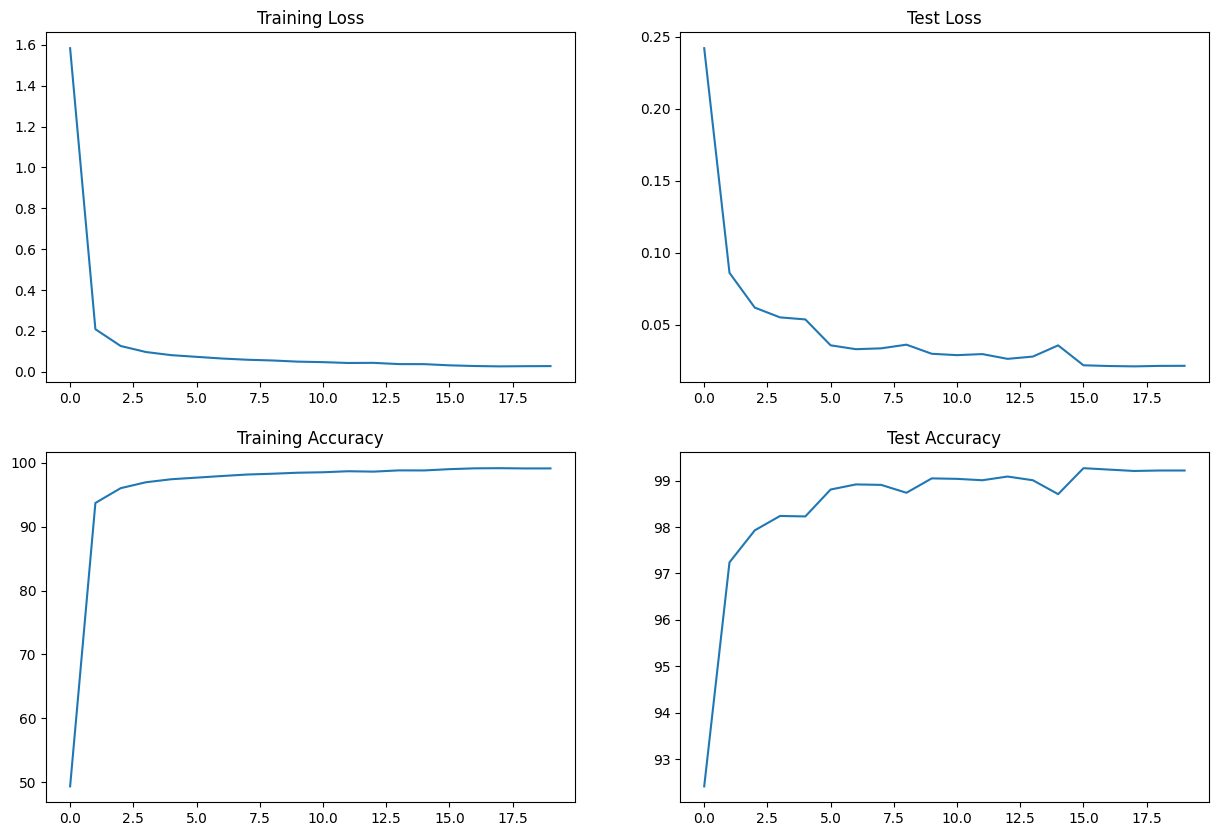

In [12]:
plot_history(trainer.train_losses, trainer.train_acc, trainer.test_losses, trainer.test_acc)

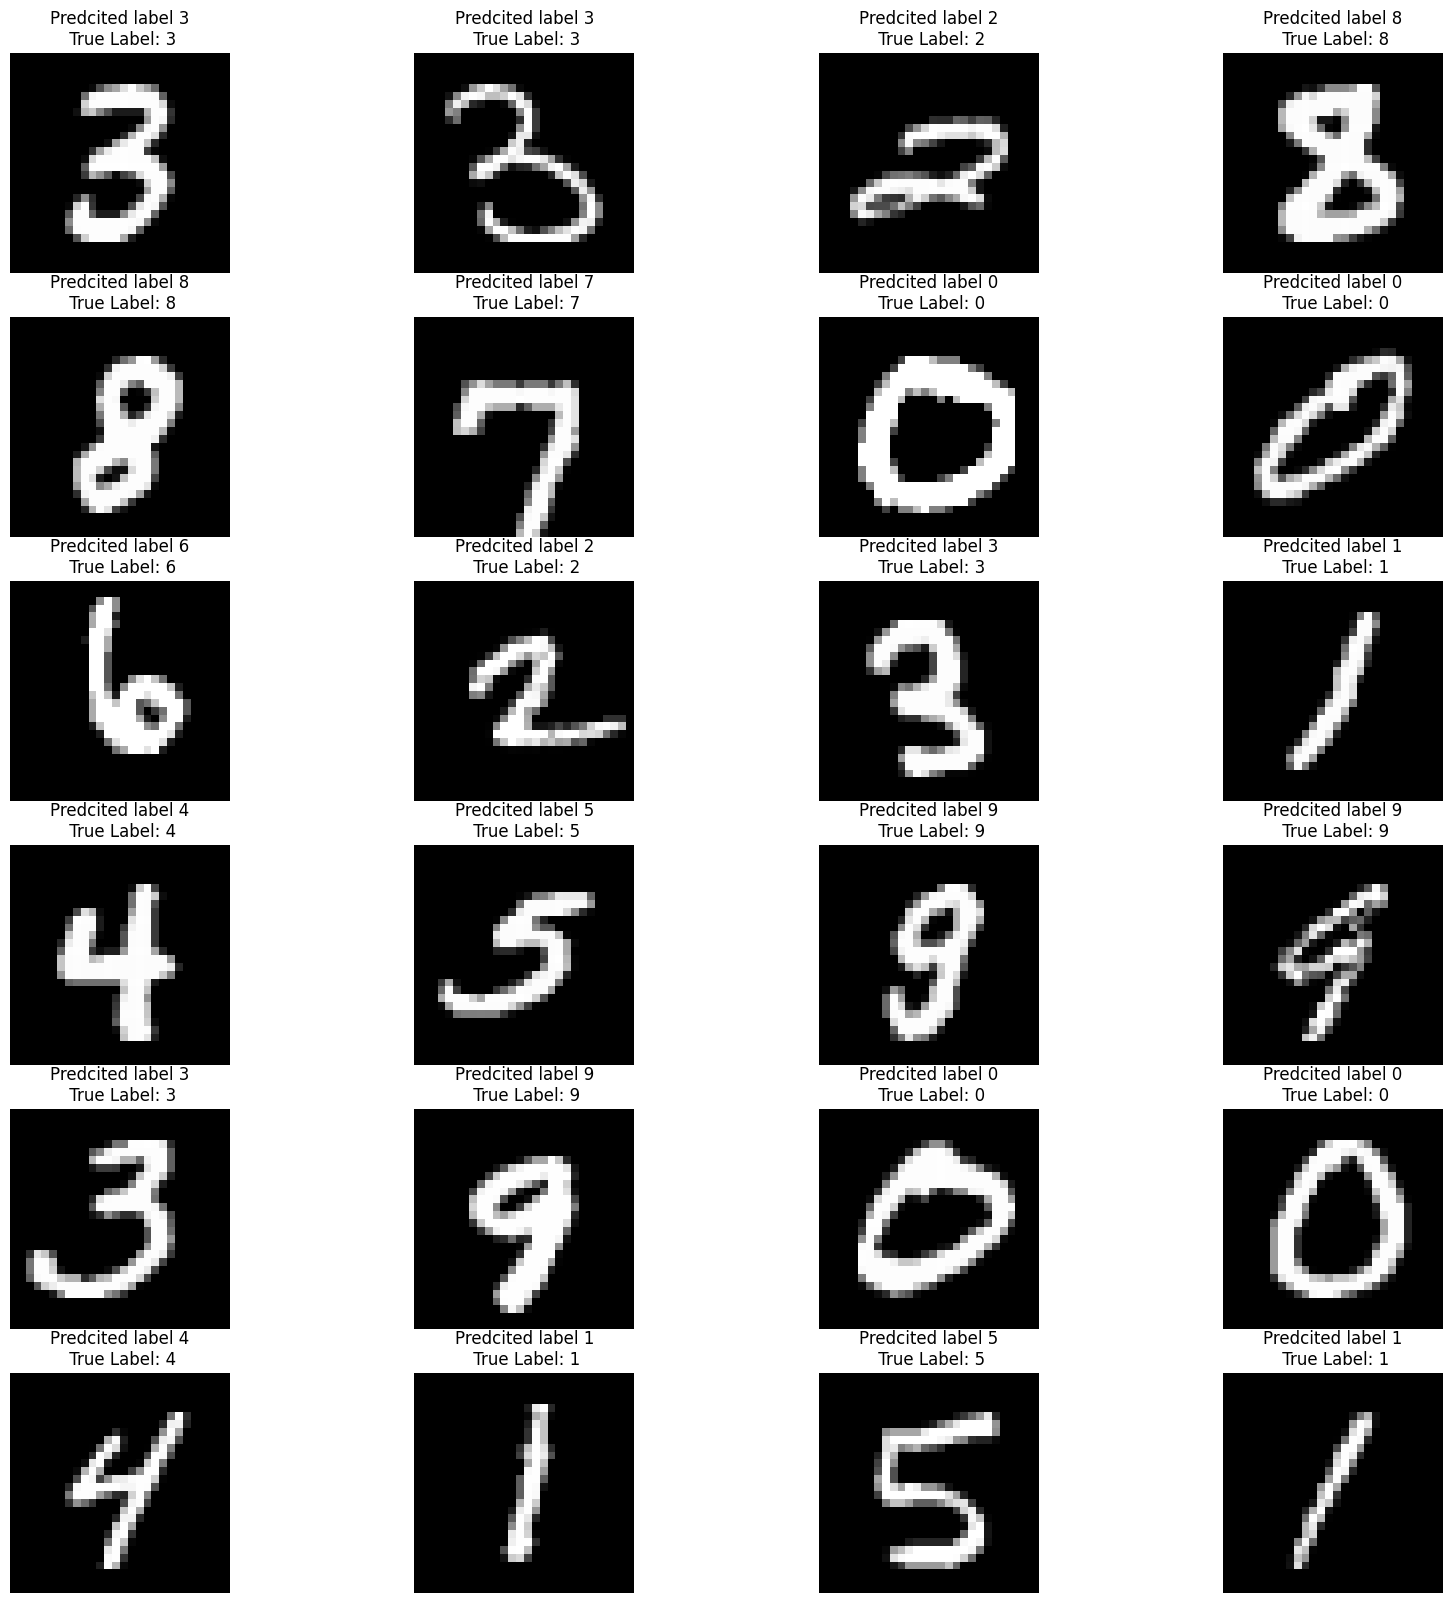

In [15]:
evaluate_model(trainer.model, test_loader, device)